In [1]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import requests
import descartes
import calendar
import seaborn as sns
import matplotlib
# Loading data (https://www.nti.org/analysis/articles/cns-north-korea-missile-test-database/). Encoding problem solved with 'unicode_escape'.
df = pd.read_csv('../data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', index_col= "F1")
# Dropping unused columns.
df = df.drop(columns=['Launch Agency/Authority', 'Other Name', 'Additional Information', 'Source(s)', 'Launch Time (UTC)', 'Date Entered/Updated', 'Apogee'])
# Changing formats (str to int or float)
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Finally, I can change it to numeric pandas table.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce').fillna(0)
df['Landing Location'] = df['Landing Location'].apply(lambda x: x.replace('330km east of Hachinohe and 4000 km out into Pacific Ocean', '330km east of Hachinohe') if isinstance(x, str) else x)
# Changing 'location' data
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
# Date changes
df['Date'] = pd.to_datetime(df['Date'])
# Creating a new column for separating the year values in numeric format.
df['Year'] = df['Date'].dt.year
# Another column for changing number values to string values.
df['Month_Number'] = df['Date'].dt.month
# Another column for separating values to month specifically.
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])
# Another column for counting test numbers.
df["# of Test"] = 1
# Simplifying the Year/Month format.
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

Part 1. Must have code for plotting data

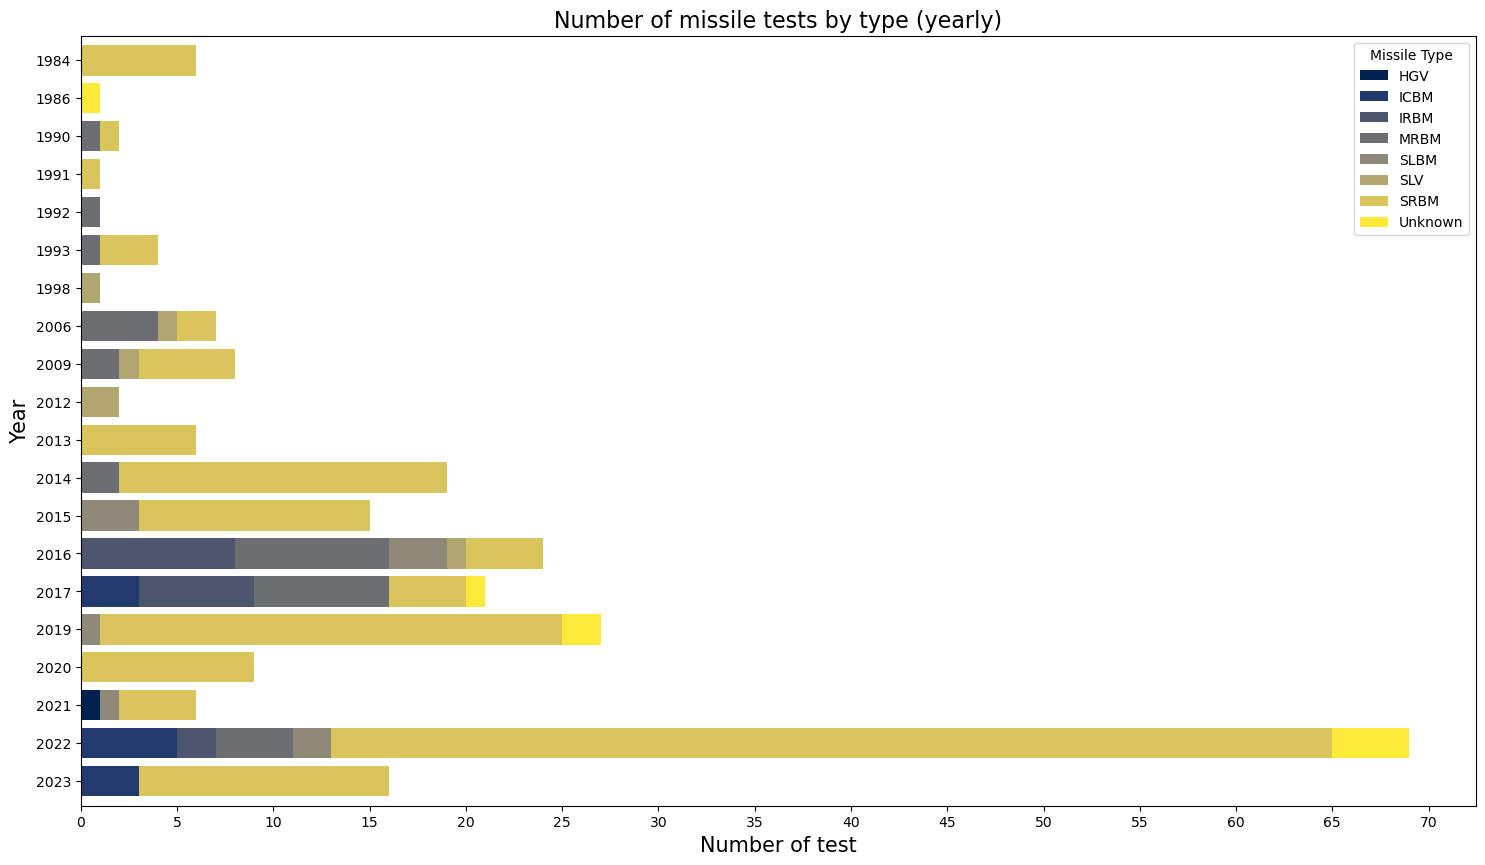

In [3]:
# This color is color-blind friendly
colors = plt.cm.GnBu(np.linspace(0, 1, 10))

# Stacked graph for number of test by year
fig, ax = plt.subplots(figsize=(18, 10))
# Creating a pivot table with three columns. Sum the # of tests
pivot_table = df.pivot_table(index='Year', columns='Missile Type', values='# of Test', aggfunc='sum')
# To order it properly, setting the index backwards
pivot_table = pivot_table.iloc[::-1] 
# Configure the plot
pivot_table.plot(kind='barh', stacked=True, ax=ax,width=0.8, cmap='cividis')
plt.xlabel('Number of test', size='15')
plt.ylabel('Year', size='15')
plt.title('Number of missile tests by type (yearly)', size='16')
plt.legend(title='Missile Type', bbox_to_anchor=(1, 1))
# Setting the xtick incremending by 5
plt.xticks(range(0, 71, 5))

plt.show()

Part 2. Additional comments

In [ ]:
# Adding comments
plt.text(30, 3.7, 'Sep 17\nIRBM\n(Pacific Ocean)', fontsize=10, color='red', horizontalalignment='center')
plt.text(66.5, 1.6, 'Oct 22\nIRBM\n(Pacific Ocean)', fontsize=10, color='red', horizontalalignment='center')
